# Introduction

We are going to calculate the return of an investment portfolio of 5 Stocks.
All the 5 stocks are from the German DAX30 index. We are going to consider the following stocks:
Allianz SE, BASF, Deutsche Bank AG, Deutsche Post AG, SAP SE.

We are going to find the return for 1 year (15.06.2019 to 15.06.2019)

# Importing the Libraries 

In [115]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

# Reading the Stock information from Yahoo Finance

In [116]:
tickers = ['ALV.DE', 'BAS.DE', 'DBK.DE', 'DPW.DE', 'SAP.DE']
portfolio_weights = np.array([0.20, 0.30, 0.10, 0.25, 0.15])
stock_data = pd.DataFrame()
for t in tickers:
    stock_data[t] = wb.DataReader(t, data_source='yahoo', start='2019-6-15')['Adj Close']

# Checking if there is any missing value

In [117]:
print ("Number of missing value in the DataFrame: ",stock_data.isnull().sum().sum())

Number of missing value in the DataFrame:  0


# Getting familiar with the Dataset

In [118]:
stock_data.describe()

,ALV.DE,BAS.DE,DBK.DE,DPW.DE,SAP.DE
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,188.768696,55.053529,6.980267,28.544576,110.980319
std,23.513904,7.897350,0.971889,3.164944,8.479507
min,111.922806,36.275753,4.871000,18.220480,85.095543
25%,182.772766,50.775000,6.463000,27.040810,104.759872
50%,199.250824,57.403694,6.852000,28.480000,112.334282
75%,205.293701,60.298508,7.319500,31.165352,118.442364
max,218.202454,66.427330,10.204000,33.287228,125.696312


In [119]:
stock_data.head()

,ALV.DE,BAS.DE,DBK.DE,DPW.DE,SAP.DE
Date,,,,,
2019-06-17,195.770859,55.740223,6.109,26.091925,111.304947
2019-06-18,198.498398,57.236416,6.330,26.716566,114.742554
2019-06-19,199.109726,57.803299,6.485,26.635506,113.596687
2019-06-20,199.250824,58.119267,6.317,27.021734,115.286362
2019-06-21,200.050262,58.258659,6.360,27.074186,115.072723


# Normalization to 100: (Current Price / Initial Price) * 100
We are going to normalize to a hundred (so that every stock have the same starting point in the Graph) and plot the Information

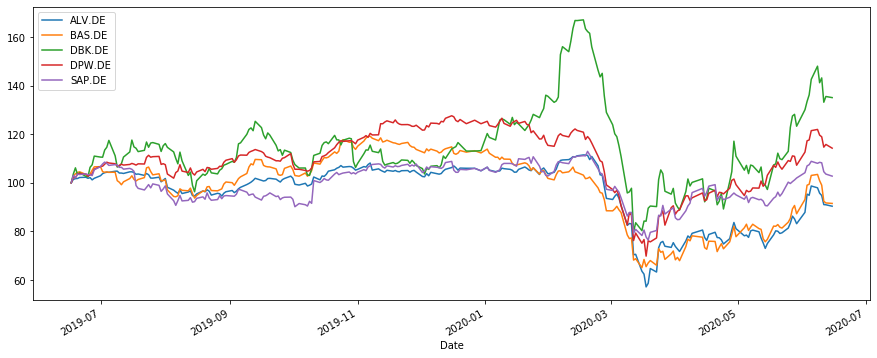

In [120]:
(stock_data / stock_data.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

We can observe that other than the Deutsche Bank stock, all the other stocks follow a similar path. The stock price was initially increasing. Then due to the COVID-19 lockdown, the price reduced, and then the stocks eventually recovered the value.

# Return of the Portfolio

In [121]:
stock_day_returns = (stock_data / stock_data.shift(1)) - 1
stock_annual_returns = stock_day_returns.mean() * 251
stock_annual_returns.head()

ALV.DE   -0.024129
BAS.DE   -0.014936
DBK.DE    0.465568
DPW.DE    0.202242
SAP.DE    0.078772
dtype: float64

In [122]:
portfolio_returns = round(np.dot(stock_annual_returns, weights), 3) * 100
print ("Return of the Portfolio in 1 (one) year is: ", portfolio_returns, "%")

Return of the Portfolio in 1 (one) year is:  14.2 %


# Conclusion:
In this project, we have considered 5 stocks from the German DAX30 index. Despite the COVID-19 crisis, the stocks are showing a decent annual 14.20% return.
This same model can be utilized to calculate the return of a portfolio of any size/time-period.